In [1]:
#Import Libraries
import csv
import pandas as pd
import numpy as np
from arch import arch_model
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import scipy
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.spatial.distance import pdist, squareform

import sklearn
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC, SVR
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import cross_val_score

## Data Importing

In [2]:
# Q1.1 Import the data from the csv file

data = pd.read_csv("/Users/Anant/Desktop/WQU/Group Work/MScFE 650 MLF GWP Data.csv")
data

Date     LUXXX  MSCI ARGENTINA  BLP ORIENTE MEDIO  MSCI AUSTRALIA  \
0     1-Jan-16  1390.716         2376.29          3525.9150         1068.79   
1     8-Jan-16  1291.267         2260.85          3280.6683         1005.56   
2    15-Jan-16  1257.086         2217.50          3118.2981          985.38   
3    22-Jan-16  1254.167         2281.98          2935.0677          985.87   
4    29-Jan-16  1298.240         2462.19          3134.0840         1005.56   
..         ...       ...             ...                ...             ...   
247  25-Sep-20   988.345         1450.64          2252.2500         1166.97   
248   2-Oct-20  1037.211         1506.32          2265.7000         1128.45   
249   9-Oct-20  1075.670         1617.45          2214.3200         1187.29   
250  16-Oct-20  1068.089         1628.12          2194.6300         1200.97   
251  23-Oct-20  1090.573         1618.83          2185.5500         1201.19   

     MSCI AUSTRIA  MSCI BELGIUM  MSCI BRAZIL  MSCI CANADA  MSCI CHINA  ...  \
0          106.70        105.38      1036.23      1663.27       59.47  ...   
1           97.66         99.35       952.01      1586.18       54.63  ...   
2           93.54         97.32       904.64      1541.08       51.54  ...   
3           95.79        100.73       879.17      1582.10       51.15  ...   
4           96.93        103.05       958.97      1638.84       52.13  ...   
..            ...           ...          ...          ...         ...  ...   
247         84.95         64.63      1424.53      2018.62       94.77  ...   
248         84.89         66.00      1365.07      2031.76       97.19  ...   
249         90.01         69.35      1447.85      2076.53      101.03  ...   
250         88.66         66.90      1430.12      2058.60      103.13  ...   
251         89.74         66.46      1478.56      2038.44      103.54  ...   

     MSCI NORWAY  MSCI PERU  MSCI RUSSIA  MSCI SINGAPORE  MSCI SOUTH AFRICA  \
0        2373.17     811.96       404.73       1507.8101            1255.75   
1        2209.38     751.09       388.05       1437.6600            1177.76   
2        2095.60     720.23       344.45       1372.9800            1133.72   
3        2173.55     745.96       367.44       1350.0500            1160.48   
4        2214.88     825.18       400.93       1375.1000            1239.58   
..           ...        ...          ...             ...                ...   
247      2570.43    1162.66       554.53       1328.1400            1238.65   
248      2587.30    1172.45       543.08       1344.0300            1276.25   
249      2635.08    1212.32       553.32       1358.9700            1291.47   
250      2622.38    1172.05       537.28       1366.6100            1290.69   
251      2618.11    1217.40       553.13       1360.9100            1306.22   

     MSCI SPAIN  MSCI SWEDEN  MSCI SWITZERLAND  MSCI UK  MSCI USA  
0        108.40     11136.65           1148.37  1818.40   1949.70  
1        101.00     10389.93           1075.30  1722.00   1831.88  
2         97.34     10042.32           1056.01  1692.43   1789.56  
3         99.21     10469.07           1076.48  1719.61   1814.12  
4        100.06     10432.42           1087.17  1774.40   1843.88  
..          ...          ...               ...      ...       ...  
247       78.45     14099.14           1362.07  1641.51   3191.72  
248       79.97     14355.01           1368.78  1658.14   3243.91  
249       82.44     14602.91           1375.90  1687.56   3370.62  
250       81.31     14558.72           1360.43  1655.95   3379.31  
251       81.81     14472.01           1337.48  1642.18   3358.93  

[252 rows x 36 columns]

In [3]:
# Log series
df1 = np.log(data.drop(columns=['Date']))

# Log return series
df2 = df1 - df1.shift(1)
df2 = df2.dropna()
df2

LUXXX  MSCI ARGENTINA  BLP ORIENTE MEDIO  MSCI AUSTRALIA  \
1   -0.074195       -0.049800          -0.072093       -0.060983   
2   -0.026828       -0.019360          -0.050760       -0.020273   
3   -0.002325        0.028663          -0.060557        0.000497   
4    0.034538        0.076008           0.065606        0.019775   
5   -0.018352        0.006768           0.030297       -0.004625   
..        ...             ...                ...             ...   
247 -0.062581       -0.039489          -0.030012        0.021087   
248  0.048259        0.037665           0.005954       -0.033566   
249  0.036408        0.071181          -0.022938        0.050828   
250 -0.007073        0.006575          -0.008932        0.011456   
251  0.020832       -0.005722          -0.004146        0.000183   

     MSCI AUSTRIA  MSCI BELGIUM  MSCI BRAZIL  MSCI CANADA  MSCI CHINA  \
1       -0.088529     -0.058924    -0.084769    -0.047457   -0.084889   
2       -0.043103     -0.020644    -0.051038    -0.028845   -0.058225   
3        0.023769      0.034439    -0.028559     0.026270   -0.007596   
4        0.011831      0.022771     0.086882     0.035236    0.018978   
5       -0.026342     -0.068473     0.024332    -0.007454   -0.024271   
..            ...           ...          ...          ...         ...   
247     -0.054965     -0.058885    -0.067096    -0.005085   -0.038299   
248     -0.000707      0.020976    -0.042636     0.006488    0.025215   
249      0.058564      0.049511     0.058874     0.021796    0.038750   
250     -0.015112     -0.035967    -0.012321    -0.008672    0.020573   
251      0.012108     -0.006599     0.033310    -0.009841    0.003968   

     MSCI DENMARK  ...  MSCI NORWAY  MSCI PERU  MSCI RUSSIA  MSCI SINGAPORE  \
1       -0.045825  ...    -0.071515  -0.077926    -0.042086       -0.047642   
2       -0.053627  ...    -0.052872  -0.041955    -0.119185       -0.046033   
3        0.035461  ...     0.036522   0.035101     0.064611       -0.016842   
4        0.021603  ...     0.018836   0.100930     0.087227        0.018385   
5       -0.078636  ...     0.004343   0.009816    -0.032782        0.002767   
..            ...  ...          ...        ...          ...             ...   
247     -0.005867  ...    -0.036408  -0.038802    -0.055472       -0.010687   
248      0.023742  ...     0.006542   0.008385    -0.020864        0.011893   
249      0.033707  ...     0.018299   0.033440     0.018680        0.011054   
250      0.006148  ...    -0.004831  -0.033782    -0.029417        0.005606   
251     -0.029401  ...    -0.001630   0.037963     0.029074       -0.004180   

     MSCI SOUTH AFRICA  MSCI SPAIN  MSCI SWEDEN  MSCI SWITZERLAND   MSCI UK  \
1            -0.064119   -0.070708    -0.069404         -0.065744 -0.054471   
2            -0.038110   -0.036911    -0.034029         -0.018102 -0.017321   
3             0.023329    0.019029     0.041617          0.019199  0.015932   
4             0.065939    0.008531    -0.003507          0.009882  0.031365   
5            -0.002245   -0.035295    -0.016709         -0.042321 -0.038795   
..                 ...         ...          ...               ...       ...   
247          -0.024885   -0.042060    -0.027255         -0.027609 -0.028733   
248           0.029904    0.019190     0.017985          0.004914  0.010080   
249           0.011855    0.030419     0.017122          0.005188  0.017587   
250          -0.000604   -0.013802    -0.003031         -0.011307 -0.018909   
251           0.011961    0.006130    -0.005974         -0.017014 -0.008350   

     MSCI USA  
1   -0.062333  
2   -0.023373  
3    0.013631  
4    0.016272  
5   -0.032605  
..        ...  
247 -0.005265  
248  0.016219  
249  0.038317  
250  0.002575  
251 -0.006049  

[251 rows x 35 columns]

## Average Data Summaries

In [4]:
# Q2.1 Calculate the mean of each series

avg = df2.mean()
avg.name = 'Mean'
avg = pd.DataFrame(avg)
avg

Mean
LUXXX                  -0.000969
MSCI ARGENTINA         -0.001529
BLP ORIENTE MEDIO      -0.001905
MSCI AUSTRALIA          0.000465
MSCI AUSTRIA           -0.000690
MSCI BELGIUM           -0.001837
MSCI BRAZIL             0.001416
MSCI CANADA             0.000810
MSCI CHINA              0.002209
MSCI DENMARK            0.001176
MSCI EM ASIA            0.001794
MSCI EM EU-MIDE-AFRICA  0.000043
MSCI EM EUROPE          0.000094
MSCI EM LATIN AMERICA   0.000290
MSCI FINLAND            0.000387
MSCI FRANCE             0.000352
MSCI GERMANY            0.000055
MSCI HONG KONG          0.000531
MSCI INDIA              0.001380
MSCI ITALY             -0.000804
MSCI JAPAN              0.000187
MSCI KOREA              0.001358
MSCI MEXICO            -0.001260
MSCI NETHERLANDS        0.001378
MSCI NEW ZEALAND        0.002119
MSCI NORWAY             0.000391
MSCI PERU               0.001614
MSCI RUSSIA             0.001245
MSCI SINGAPORE         -0.000408
MSCI SOUTH AFRICA       0.000157
MSCI SPAIN             -0.001121
MSCI SWEDEN             0.001044
MSCI SWITZERLAND        0.000607
MSCI UK                -0.000406
MSCI USA                0.002167

In [5]:
# Q2.2 Calculate the trimmed mean of each series, where trim=5%

Trim5 = stats.trim_mean(df2, 0.05)
Trim5

array([-2.56148383e-04,  2.14300686e-03, -1.06189857e-03,  1.49917575e-03,
        4.14663202e-04, -4.40057795e-04,  2.09894074e-03,  2.15362542e-03,
        2.92257557e-03,  2.57805057e-03,  2.67389528e-03,  8.83446487e-04,
        1.55215988e-03,  1.24466371e-03,  1.34948961e-03,  1.45251689e-03,
        9.72404119e-04,  1.22426942e-03,  2.05280222e-03,  5.49368415e-04,
        1.04771279e-03,  2.17168854e-03,  8.13002010e-05,  2.44297579e-03,
        2.53433817e-03,  1.17921720e-03,  2.07510942e-03,  2.86555906e-03,
       -3.54817030e-04,  6.88031414e-04, -1.12487013e-04,  2.08347534e-03,
        1.88499174e-03,  4.90509144e-04,  3.41379079e-03])

In [6]:
# Q2.3 Calculate the trimmed mean of each series, where trim=50%

median = stats.trim_mean(df2, 0.4999)
median

array([ 2.79551596e-04,  1.16256703e-03, -4.95348264e-04,  2.23051537e-03,
        0.00000000e+00,  6.99755114e-04,  4.16108534e-03,  2.84109837e-03,
        4.28590093e-03,  4.87433120e-03,  3.12125320e-03,  1.54390650e-03,
        2.19304662e-03,  3.11302411e-03,  1.20078923e-03,  2.91800616e-03,
        2.54965248e-03,  3.56818410e-03,  4.31784039e-03,  6.45994855e-04,
        2.38078099e-03,  2.35727899e-03, -1.94363931e-03,  3.53654798e-03,
        3.55182808e-03,  2.10886018e-03,  3.72760108e-03,  6.39061480e-03,
        8.68285642e-04, -7.06608913e-05,  7.73362015e-04,  2.45815559e-03,
        2.68702536e-03,  1.71776708e-03,  3.92414488e-03])

In [7]:
datasummary = avg
datasummary['TrimMean5'] = Trim5.tolist()
datasummary['Median'] = median.tolist()
datasummary

Mean  TrimMean5    Median
LUXXX                  -0.000969  -0.000256  0.000280
MSCI ARGENTINA         -0.001529   0.002143  0.001163
BLP ORIENTE MEDIO      -0.001905  -0.001062 -0.000495
MSCI AUSTRALIA          0.000465   0.001499  0.002231
MSCI AUSTRIA           -0.000690   0.000415  0.000000
MSCI BELGIUM           -0.001837  -0.000440  0.000700
MSCI BRAZIL             0.001416   0.002099  0.004161
MSCI CANADA             0.000810   0.002154  0.002841
MSCI CHINA              0.002209   0.002923  0.004286
MSCI DENMARK            0.001176   0.002578  0.004874
MSCI EM ASIA            0.001794   0.002674  0.003121
MSCI EM EU-MIDE-AFRICA  0.000043   0.000883  0.001544
MSCI EM EUROPE          0.000094   0.001552  0.002193
MSCI EM LATIN AMERICA   0.000290   0.001245  0.003113
MSCI FINLAND            0.000387   0.001349  0.001201
MSCI FRANCE             0.000352   0.001453  0.002918
MSCI GERMANY            0.000055   0.000972  0.002550
MSCI HONG KONG          0.000531   0.001224  0.003568
MSCI INDIA              0.001380   0.002053  0.004318
MSCI ITALY             -0.000804   0.000549  0.000646
MSCI JAPAN              0.000187   0.001048  0.002381
MSCI KOREA              0.001358   0.002172  0.002357
MSCI MEXICO            -0.001260   0.000081 -0.001944
MSCI NETHERLANDS        0.001378   0.002443  0.003537
MSCI NEW ZEALAND        0.002119   0.002534  0.003552
MSCI NORWAY             0.000391   0.001179  0.002109
MSCI PERU               0.001614   0.002075  0.003728
MSCI RUSSIA             0.001245   0.002866  0.006391
MSCI SINGAPORE         -0.000408  -0.000355  0.000868
MSCI SOUTH AFRICA       0.000157   0.000688 -0.000071
MSCI SPAIN             -0.001121  -0.000112  0.000773
MSCI SWEDEN             0.001044   0.002083  0.002458
MSCI SWITZERLAND        0.000607   0.001885  0.002687
MSCI UK                -0.000406   0.000491  0.001718
MSCI USA                0.002167   0.003414  0.003924

In [8]:
# 2.4 Using subjective weights, apply 3 probabilities (that sum to 1) for each of the 3 averages

weight = [0.5,0.2,0.3]
weighted_ret = weight[0]*datasummary['Mean'] + weight[1]*datasummary['TrimMean5'] + weight[2]*datasummary['Median']
weighted_ret

LUXXX                    -0.000452
MSCI ARGENTINA            0.000013
BLP ORIENTE MEDIO        -0.001314
MSCI AUSTRALIA            0.001202
MSCI AUSTRIA             -0.000262
MSCI BELGIUM             -0.000796
MSCI BRAZIL               0.002376
MSCI CANADA               0.001688
MSCI CHINA                0.002975
MSCI DENMARK              0.002566
MSCI EM ASIA              0.002368
MSCI EM EU-MIDE-AFRICA    0.000661
MSCI EM EUROPE            0.001016
MSCI EM LATIN AMERICA     0.001328
MSCI FINLAND              0.000824
MSCI FRANCE               0.001342
MSCI GERMANY              0.000987
MSCI HONG KONG            0.001581
MSCI INDIA                0.002396
MSCI ITALY               -0.000099
MSCI JAPAN                0.001017
MSCI KOREA                0.001821
MSCI MEXICO              -0.001197
MSCI NETHERLANDS          0.002239
MSCI NEW ZEALAND          0.002632
MSCI NORWAY               0.001064
MSCI PERU                 0.002340
MSCI RUSSIA               0.003113
MSCI SINGAPORE      

In [9]:
# 2.5 Rank the series, from highest expected return to lowest expected return using your weighted factor

weighted_ret.sort_values(ascending = False)

MSCI RUSSIA               0.003113
MSCI CHINA                0.002975
MSCI USA                  0.002944
MSCI NEW ZEALAND          0.002632
MSCI DENMARK              0.002566
MSCI INDIA                0.002396
MSCI BRAZIL               0.002376
MSCI EM ASIA              0.002368
MSCI PERU                 0.002340
MSCI NETHERLANDS          0.002239
MSCI KOREA                0.001821
MSCI CANADA               0.001688
MSCI SWEDEN               0.001676
MSCI HONG KONG            0.001581
MSCI SWITZERLAND          0.001487
MSCI FRANCE               0.001342
MSCI EM LATIN AMERICA     0.001328
MSCI AUSTRALIA            0.001202
MSCI NORWAY               0.001064
MSCI JAPAN                0.001017
MSCI EM EUROPE            0.001016
MSCI GERMANY              0.000987
MSCI FINLAND              0.000824
MSCI EM EU-MIDE-AFRICA    0.000661
MSCI UK                   0.000410
MSCI SOUTH AFRICA         0.000195
MSCI ARGENTINA            0.000013
MSCI SINGAPORE           -0.000015
MSCI ITALY          

## Volatility Data Summaries

In [10]:
# 3.1 For the log return series, compute a EWMA

df4 = pd.Series.ewm(df2, span=10, adjust = False).std()
EWMA = df4.mean()
EWMA.name = 'EWMA'
EWMA

LUXXX                     0.031236
MSCI ARGENTINA            0.052421
BLP ORIENTE MEDIO         0.026452
MSCI AUSTRALIA            0.019785
MSCI AUSTRIA              0.031829
MSCI BELGIUM              0.026797
MSCI BRAZIL               0.044126
MSCI CANADA               0.017458
MSCI CHINA                0.028300
MSCI DENMARK              0.022730
MSCI EM ASIA              0.023440
MSCI EM EU-MIDE-AFRICA    0.028380
MSCI EM EUROPE            0.028808
MSCI EM LATIN AMERICA     0.035406
MSCI FINLAND              0.024169
MSCI FRANCE               0.024128
MSCI GERMANY              0.025610
MSCI HONG KONG            0.022630
MSCI INDIA                0.020574
MSCI ITALY                0.028654
MSCI JAPAN                0.026161
MSCI KOREA                0.022570
MSCI MEXICO               0.033840
MSCI NETHERLANDS          0.022646
MSCI NEW ZEALAND          0.020288
MSCI NORWAY               0.021446
MSCI PERU                 0.032372
MSCI RUSSIA               0.034130
MSCI SINGAPORE      

In [11]:
# 3.2 For the log series, run a GARCH(1,1) model

variances = []
for column in df2.columns:
    garch11 = arch_model(df2[column].values, p=1, q=1, vol = 'GARCH')
    res = garch11.fit(update_freq=10)
    variance = res.conditional_volatility.mean()
    variances.append([column,variance])
variances = pd.Series(dict(variances))
variances.name = 'GARCH11'
variances.tail

Optimization terminated successfully    (Exit mode 0)
            Current function value: -520.6680227269719
            Iterations: 8
            Function evaluations: 56
            Gradient evaluations: 8
Iteration:     10,   Func. Count:     64,   Neg. LLF: -381.54749680085934
Optimization terminated successfully    (Exit mode 0)
            Current function value: -381.5504179558079
            Iterations: 14
            Function evaluations: 83
            Gradient evaluations: 14
Iteration:     10,   Func. Count:     83,   Neg. LLF: -336.3983463998768
Optimization terminated successfully    (Exit mode 0)
            Current function value: -569.1086973466013
            Iterations: 16
            Function evaluations: 105
            Gradient evaluations: 14
Iteration:     10,   Func. Count:     69,   Neg. LLF: -632.6229731504877
Optimization terminated successfully    (Exit mode 0)
            Current function value: -632.6229731504877
            Iterations: 11
            Fun

<bound method NDFrame.tail of LUXXX                     0.031735
MSCI ARGENTINA            0.056142
BLP ORIENTE MEDIO         0.028676
MSCI AUSTRALIA            0.020114
MSCI AUSTRIA              0.032813
MSCI BELGIUM              0.029085
MSCI BRAZIL               0.045880
MSCI CANADA               0.019213
MSCI CHINA                0.028416
MSCI DENMARK              0.023502
MSCI EM ASIA              0.024247
MSCI EM EU-MIDE-AFRICA    0.028798
MSCI EM EUROPE            0.030191
MSCI EM LATIN AMERICA     0.036069
MSCI FINLAND              0.025421
MSCI FRANCE               0.025540
MSCI GERMANY              0.026659
MSCI HONG KONG            0.023329
MSCI INDIA                0.021178
MSCI ITALY                0.030316
MSCI JAPAN                0.027084
MSCI KOREA                0.023160
MSCI MEXICO               0.034415
MSCI NETHERLANDS          0.023493
MSCI NEW ZEALAND          0.020915
MSCI NORWAY               0.023013
MSCI PERU                 0.032806
MSCI RUSSIA              

In [12]:
# 3.3 For the price series, compute the 1-month range (high price minus low price over past 4 weeks)

df3 = np.log(data.rolling(4).max()) - np.log(data.rolling(4).min())
df3 = df3.dropna()
Range = df3.mean()
Range.name = 'Range'
Range

LUXXX                     0.053367
MSCI ARGENTINA            0.093725
BLP ORIENTE MEDIO         0.045443
MSCI AUSTRALIA            0.033973
MSCI AUSTRIA              0.055549
MSCI BELGIUM              0.044584
MSCI BRAZIL               0.082557
MSCI CANADA               0.030553
MSCI CHINA                0.051899
MSCI DENMARK              0.039874
MSCI EM ASIA              0.042528
MSCI EM EU-MIDE-AFRICA    0.049623
MSCI EM EUROPE            0.051605
MSCI EM LATIN AMERICA     0.063709
MSCI FINLAND              0.041239
MSCI FRANCE               0.040641
MSCI GERMANY              0.043266
MSCI HONG KONG            0.041658
MSCI INDIA                0.038100
MSCI ITALY                0.051397
MSCI JAPAN                0.043752
MSCI KOREA                0.040862
MSCI MEXICO               0.060561
MSCI NETHERLANDS          0.038911
MSCI NEW ZEALAND          0.036938
MSCI NORWAY               0.037017
MSCI PERU                 0.057135
MSCI RUSSIA               0.062018
MSCI SINGAPORE      

In [13]:
volsummary = pd.merge(EWMA, variances, right_index = True, left_index = True)
volsummary = volsummary.join(Range)
volsummary

EWMA   GARCH11     Range
LUXXX                   0.031236  0.031735  0.053367
MSCI ARGENTINA          0.052421  0.056142  0.093725
BLP ORIENTE MEDIO       0.026452  0.028676  0.045443
MSCI AUSTRALIA          0.019785  0.020114  0.033973
MSCI AUSTRIA            0.031829  0.032813  0.055549
MSCI BELGIUM            0.026797  0.029085  0.044584
MSCI BRAZIL             0.044126  0.045880  0.082557
MSCI CANADA             0.017458  0.019213  0.030553
MSCI CHINA              0.028300  0.028416  0.051899
MSCI DENMARK            0.022730  0.023502  0.039874
MSCI EM ASIA            0.023440  0.024247  0.042528
MSCI EM EU-MIDE-AFRICA  0.028380  0.028798  0.049623
MSCI EM EUROPE          0.028808  0.030191  0.051605
MSCI EM LATIN AMERICA   0.035406  0.036069  0.063709
MSCI FINLAND            0.024169  0.025421  0.041239
MSCI FRANCE             0.024128  0.025540  0.040641
MSCI GERMANY            0.025610  0.026659  0.043266
MSCI HONG KONG          0.022630  0.023329  0.041658
MSCI INDIA              0.020574  0.021178  0.038100
MSCI ITALY              0.028654  0.030316  0.051397
MSCI JAPAN              0.026161  0.027084  0.043752
MSCI KOREA              0.022570  0.023160  0.040862
MSCI MEXICO             0.033840  0.034415  0.060561
MSCI NETHERLANDS        0.022646  0.023493  0.038911
MSCI NEW ZEALAND        0.020288  0.020915  0.036938
MSCI NORWAY             0.021446  0.023013  0.037017
MSCI PERU               0.032372  0.032806  0.057135
MSCI RUSSIA             0.034130  0.036719  0.062018
MSCI SINGAPORE          0.020455  0.021463  0.036365
MSCI SOUTH AFRICA       0.026671  0.026736  0.045604
MSCI SPAIN              0.027513  0.028805  0.047470
MSCI SWEDEN             0.023879  0.024083  0.041160
MSCI SWITZERLAND        0.019509  0.019813  0.031748
MSCI UK                 0.020246  0.021308  0.034271
MSCI USA                0.021020  0.021147  0.037068

In [14]:
# 3.4 Using subjective weights, apply 3 probabilities (that sum to 1) for each of the 3 vol measures

vol_weight = [0.5,0.2,0.3]
weighted_vol = vol_weight[0]*volsummary['EWMA'] + vol_weight[1]*volsummary['GARCH11'] + vol_weight[2]*volsummary['Range']
weighted_vol

LUXXX                     0.037975
MSCI ARGENTINA            0.065556
BLP ORIENTE MEDIO         0.032594
MSCI AUSTRALIA            0.024107
MSCI AUSTRIA              0.039142
MSCI BELGIUM              0.032591
MSCI BRAZIL               0.056006
MSCI CANADA               0.021737
MSCI CHINA                0.035403
MSCI DENMARK              0.028028
MSCI EM ASIA              0.029328
MSCI EM EU-MIDE-AFRICA    0.034836
MSCI EM EUROPE            0.035924
MSCI EM LATIN AMERICA     0.044029
MSCI FINLAND              0.029541
MSCI FRANCE               0.029364
MSCI GERMANY              0.031116
MSCI HONG KONG            0.028479
MSCI INDIA                0.025952
MSCI ITALY                0.035809
MSCI JAPAN                0.031623
MSCI KOREA                0.028175
MSCI MEXICO               0.041971
MSCI NETHERLANDS          0.027695
MSCI NEW ZEALAND          0.025408
MSCI NORWAY               0.026430
MSCI PERU                 0.039888
MSCI RUSSIA               0.043014
MSCI SINGAPORE      

In [15]:
# 3.5 Rank the series, from highest volatility to lowest volatility using your weighted factor.
# For GARCH, use the unconditional variance as the average.
# For EWMA and hi-minus-low, you may average the time series of volatilities to be able to get single-number summaries for each model

weighted_vol.sort_values(ascending = False)

MSCI ARGENTINA            0.065556
MSCI BRAZIL               0.056006
MSCI EM LATIN AMERICA     0.044029
MSCI RUSSIA               0.043014
MSCI MEXICO               0.041971
MSCI PERU                 0.039888
MSCI AUSTRIA              0.039142
LUXXX                     0.037975
MSCI EM EUROPE            0.035924
MSCI ITALY                0.035809
MSCI CHINA                0.035403
MSCI EM EU-MIDE-AFRICA    0.034836
MSCI SPAIN                0.033759
BLP ORIENTE MEDIO         0.032594
MSCI BELGIUM              0.032591
MSCI SOUTH AFRICA         0.032364
MSCI JAPAN                0.031623
MSCI GERMANY              0.031116
MSCI FINLAND              0.029541
MSCI FRANCE               0.029364
MSCI EM ASIA              0.029328
MSCI SWEDEN               0.029104
MSCI HONG KONG            0.028479
MSCI KOREA                0.028175
MSCI DENMARK              0.028028
MSCI NETHERLANDS          0.027695
MSCI NORWAY               0.026430
MSCI INDIA                0.025952
MSCI USA            

## Data Visualizing: Heat Maps

In [16]:
# 4.1 Write a Python function to compute a heat map of the correlations.
# Be sure to show the scale using colors that range from blue for low values to red for high values.

# Using pandas function to compute our correlation
corr = data.corr(method='pearson')

## We have Created a correlation plot
corr.style.background_gradient(cmap='bwr')

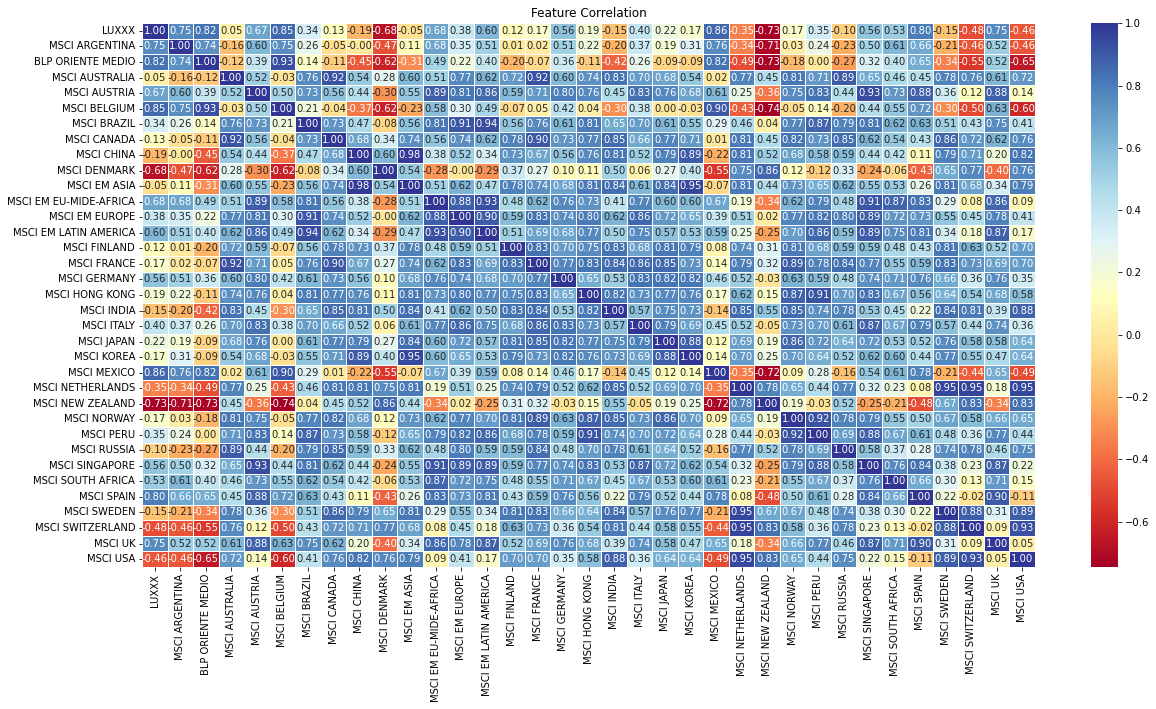

In [17]:
# Visualize feature correlation using Seaborn
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr, annot=True, annot_kws={"size": 10}, fmt="0.2f", linewidths=0.5, square=False, cbar=True, cmap='RdYlBu')
ax.set_title('Feature Correlation', fontsize=12, color='black');

## Unsupervised Learning: Clustering

In [18]:
# 5.1 Calculate the Euclidean distance matrix for all 35 series

distances = pdist(df2.values, metric='euclidean')
dist_matrix = squareform(distances)
dist_matrix

array([[0.        , 0.2270223 , 0.47122577, ..., 0.58329552, 0.34806958,
        0.43238105],
       [0.2270223 , 0.        , 0.34683588, ..., 0.41760291, 0.20974511,
        0.295381  ],
       [0.47122577, 0.34683588, 0.        , ..., 0.21333371, 0.20849398,
        0.1971874 ],
       ...,
       [0.58329552, 0.41760291, 0.21333371, ..., 0.        , 0.26760846,
        0.19910706],
       [0.34806958, 0.20974511, 0.20849398, ..., 0.26760846, 0.        ,
        0.16871859],
       [0.43238105, 0.295381  , 0.1971874 , ..., 0.19910706, 0.16871859,
        0.        ]])

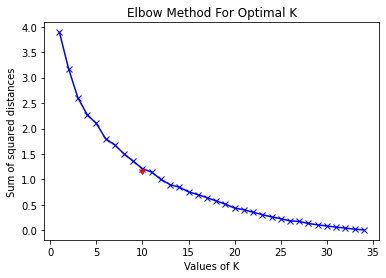

Centroids
[[-0.0589239  -0.02064445  0.03443915 ...  0.0495114  -0.03596718
  -0.0065987 ]
 [-0.07547714 -0.06894267  0.01673282 ...  0.01547968 -0.00947555
   0.01343657]
 [-0.08476887 -0.05103846 -0.02855879 ...  0.05887399 -0.01232134
   0.03331028]
 ...
 [-0.05245246 -0.06239936  0.0162509  ...  0.01789695 -0.03306648
   0.01728941]
 [-0.06233275 -0.02337298  0.01363072 ...  0.03831731  0.00257484
  -0.00604908]
 [-0.0662722  -0.01804763  0.03891749 ...  0.02244265  0.00490042
  -0.02427431]]
Grouping
[1 2 6 8 1 1 3 8 5 1 5 4 4 3 1 1 1 5 5 1 1 5 0 1 8 1 7 4 5 5 1 1 1 1 8]


In [19]:
# 5.2 Run a k-means cluster on the 35 return series

# Fit KMeans model
Sum_of_squared_distances = []
K = range(1,35)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df2.T)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.plot(10, Sum_of_squared_distances[9], marker=11, color='Red')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances') 
plt.title('Elbow Method For Optimal K')
plt.show()

# Print Centroids
centres = kmeans.cluster_centers_
print("Centroids")
print(centres)

# Print Grouping
kmeans = KMeans(n_clusters=9)
kmeans.fit(df2.T)
groups = kmeans.labels_
print("Grouping")
print(groups)

5.3 Justify your choice of k

As seen from the figure above, 10 clusters appears to provide the best balance between fit and number of clusters, as it satisfies the 'elbow method' approach visually.

In [20]:
# 5.4 Normalize each data series. Subtract each series by the weighted average from part 2.4.
#Then divide this difference by the weighted volatility from part 3.4

df5 = (df2 - weighted_ret)/weighted_vol
df5

LUXXX  MSCI ARGENTINA  BLP ORIENTE MEDIO  MSCI AUSTRALIA  \
1   -1.941884       -0.759843          -2.171546       -2.579466   
2   -0.694559       -0.295520          -1.517035       -0.890770   
3   -0.049324        0.437035          -1.817615       -0.029223   
4    0.921382        1.159235           2.053150        0.770459   
5   -0.471371        0.103041           0.969846       -0.241696   
..        ...             ...                ...             ...   
247 -1.636057       -0.602560          -0.880493        0.824857   
248  1.282697        0.574348           0.222979       -1.442183   
249  0.970637        1.085612          -0.663458        2.058570   
250 -0.174351        0.100103          -0.233730        0.425369   
251  0.560469       -0.087483          -0.086895       -0.042247   

     MSCI AUSTRIA  MSCI BELGIUM  MSCI BRAZIL  MSCI CANADA  MSCI CHINA  \
1       -2.255063     -1.783557    -1.555990    -2.260863   -2.481840   
2       -1.094508     -0.609009    -0.953728    -1.404651   -1.728681   
3        0.613948      1.081149    -0.552350     1.130836   -0.298581   
4        0.308945      0.723118     1.508856     1.543306    0.452036   
5       -0.666300     -2.076562     0.392026    -0.420563   -0.769591   
..            ...           ...          ...          ...         ...   
247     -1.397567     -1.782355    -1.240442    -0.311576   -1.165842   
248     -0.011360      0.668054    -0.803705     0.220821    0.628205   
249      1.502904      1.543619     1.008777     0.925025    1.010514   
250     -0.379391     -1.079165    -0.262428    -0.476614    0.497082   
251      0.316022     -0.178036     0.552332    -0.530403    0.028044   

     MSCI DENMARK  ...  MSCI NORWAY  MSCI PERU  MSCI RUSSIA  MSCI SINGAPORE  \
1       -1.726527  ...    -2.746043  -2.012279    -1.050774       -1.872867   
2       -2.004892  ...    -2.040692  -1.110485    -2.843177       -1.809622   
3        1.173648  ...     1.341553   0.821332     1.429717       -0.661711   
4        0.679198  ...     0.672420   2.471659     1.955486        0.723537   
5       -2.897190  ...     0.124053   0.187426    -0.834464        0.109381   
..            ...  ...          ...        ...          ...             ...   
247     -0.300896  ...    -1.417790  -1.031437    -1.361970       -0.419678   
248      0.755533  ...     0.207242   0.151549    -0.557413        0.468258   
249      1.111065  ...     0.652073   0.779688     0.361908        0.435281   
250      0.127816  ...    -0.223055  -0.905577    -0.756249        0.221032   
251     -1.140548  ...    -0.101920   0.893076     0.603544       -0.163782   

     MSCI SOUTH AFRICA  MSCI SPAIN  MSCI SWEDEN  MSCI SWITZERLAND   MSCI UK  \
1            -1.987199   -2.084101    -2.442283         -2.892681 -2.224951   
2            -1.183569   -1.082964    -1.226801         -0.842833 -0.718857   
3             0.714825    0.574072     1.372351          0.762082  0.629274   
4             2.031397    0.263112    -0.178083          0.361195  1.254936   
5            -0.075396   -1.035103    -0.631708         -1.884879 -1.589449   
..                 ...         ...          ...               ...       ...   
247          -0.774921   -1.235509    -0.994037         -1.251903 -1.181522   
248           0.917969    0.578850     0.560375          0.147470  0.392018   
249           0.360281    0.911478     0.530709          0.159260  0.696373   
250          -0.024689   -0.398435    -0.161720         -0.550478 -0.783228   
251           0.363541    0.191997    -0.262839         -0.796001 -0.355168   

     MSCI USA  
1   -2.524260  
2   -1.017671  
3    0.413277  
4    0.515398  
5   -1.374673  
..        ...  
247 -0.317444  
248  0.513383  
249  1.367916  
250 -0.014258  
251 -0.347749  

[251 rows x 35 columns]

In [21]:
# 5.5 Using the normalized data series, re-calculate the Euclidean distance matrix for all 35 series

distances_norm = pdist(df2.values, metric='euclidean')
dist_matrix_norm = squareform(distances_norm)
dist_matrix_norm

array([[0.        , 0.2270223 , 0.47122577, ..., 0.58329552, 0.34806958,
        0.43238105],
       [0.2270223 , 0.        , 0.34683588, ..., 0.41760291, 0.20974511,
        0.295381  ],
       [0.47122577, 0.34683588, 0.        , ..., 0.21333371, 0.20849398,
        0.1971874 ],
       ...,
       [0.58329552, 0.41760291, 0.21333371, ..., 0.        , 0.26760846,
        0.19910706],
       [0.34806958, 0.20974511, 0.20849398, ..., 0.26760846, 0.        ,
        0.16871859],
       [0.43238105, 0.295381  , 0.1971874 , ..., 0.19910706, 0.16871859,
        0.        ]])

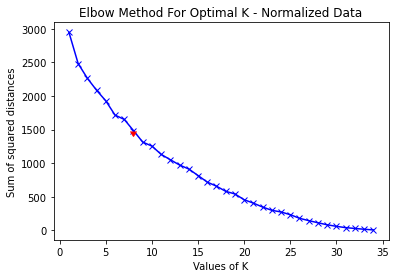

Centroids
[[-1.48836323 -1.7652505   0.42409938 ...  0.46991969 -0.94872507
   0.45300785]
 [-1.78355739 -0.60900935  1.08114939 ...  1.54361913 -1.07916457
  -0.17803642]
 [-1.18140112 -0.80429963  0.05514297 ...  0.90042244 -0.64541121
   0.23655336]
 ...
 [-1.0507745  -2.84317669  1.42971679 ...  0.36190834 -0.75624915
   0.60354373]
 [-2.48184049 -1.72868073 -0.29858112 ...  1.01051402  0.49708156
   0.02804437]
 [-2.78050234 -1.03020929  0.70686591 ...  0.84219953 -0.32333358
  -0.76465382]]
Grouping
[4 1 6 5 4 4 1 5 2 0 2 3 3 1 0 4 4 2 2 4 4 2 1 0 7 0 1 3 2 3 4 0 0 4 5]


In [22]:
# 5.6 Using the normalized data series, run a k-means cluster on the 35 transformed variables

# Fit KMeans model
Sum_of_squared_distances = []
K = range(1,35)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df5.T)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.plot(8, Sum_of_squared_distances[7], marker=11, color='Red')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances') 
plt.title('Elbow Method For Optimal K - Normalized Data')
plt.show()

# Print Centroids
centres_norm = kmeans.cluster_centers_
print("Centroids")
print(centres_norm)

# Print Grouping
kmeans = KMeans(n_clusters=8)
kmeans.fit(df5.T)
groups_norm = kmeans.labels_
print("Grouping")
print(groups_norm)

5.7 Justify your choice of k

As seen from the figure above, we see good clustering even with 8 clusters using normalized data.

5.8 Were the 2 k values the same?

The two K values were different. Normalized data gives a lower numbers of clusters as it gives improved clustering.

5.9 Did the grouping of the series change as a result of your normalization?

The grouping data above confirms that the grouping of the series has changed after the data was normalized.

## Data Selection

In [23]:
# Q 6.1  Choose one of the 35 variables to serve as your response variable (e.g. LUXXX).
# You may choose the same one that your group used in the previous assignment.

# Copy the raw data and drop the Date column
regress_data = df2.copy(deep=True)

# Extract out the X and Y data
X = regress_data.drop('LUXXX', axis = 1) ## controlling variable
Y = regress_data.LUXXX ## target Variable

## Compare unsupervised and supervised

7.1 What is the difference between unsupervised learning and supervised learning?

Supervised and unsupervised learning are examples of two different types of machine learning model approach. They differ in the way the models are trained and the condition of the training data required. The key differences are: 

1. The need for labeled data in supervised machine learning.
2. Supervised machine learning is generally used to classify data or make predictions, whereas unsupervised learning is generally used to understand relationships within datasets. 
3. Supervised machine learning is much more resource-intensive because of the need for labeled data and human oversight. Unsupervised machine learning is more of a hands-off approach.
4. On the other hand, in unsupervised machine learning it can be more difficult to reach adequate levels of accuracy because of less human oversight.

7.2 Which is clustering?  Which is CART?  Which is SVM?

1. Clustering is an unsupervised learning technique as it identifies patterns in unlabeled input data and clusters them into groups of data, where data points in each group have some similarities.

2. CART (Classification and Regression Trees) can be used for both classification and regression problems. With classification, we attempt to predict a class label, while regression is used to predict a numerical label. Essentially both methods are decisions tress and in order to develop a Decision Tree model, sufficient training examples with 'correct answers' are used to train the model. Hence CART fall under the supervised branch of machine learning algorithms. 

3. SVM is also a supervised learning method that can be used for classification as well as regression problems. SVM involves enriching the dimensionality to find a hyper-plane boundary to determine the category of the input data. SVM maps training examples to points in space so as to maximize the width of the gap between the two categories, hence it is a supervised learning algorithm.

## Compare and Contrast CART and SVM

8.1 What do the CART and SVM have in common? Be specific as to how they cut the dimensional space

Both CART and SVM are supervised machine learning techniques. They can be used for regression as well as for classification. Thus both are used to divide data at each 'level' or 'hyper-plane'. The biggest difference between the two algorithms is that SVM uses the kernel trick to turn a linearly non-separable problem into a linearly separable one (unless of course we use the linear kernel), while CART (decision trees) split the input space into hyper-rectangles according to the target. In other words, while SVM splits the space into sub-spaces separated by hyperplanes, CART being a decision tree, splits the data at each node until we reach the individual leaves of the tree.

8.2 How do the CART and SVM methodologies differ?

SVM is based on statistical learning theory. The learning theory developed in order to solve pattern recognition problems. SVM separates the classes with a decision surface that maximizes the margin between the classes. The surface is often called the optimal hyperplane and the data points closest to the hyperplane are called support vectors. The support vectors are the critical elements of the training set.

On the other hand, CART being a decision tree, has its origin in machine learning theory. Unlike other classification approaches that use a set of features (or bands) jointly to perform classification in a single decision step, the decision tree is based on a multistage or hierarchical decision scheme or a tree like structure. The tree is composed of a root node (containing all data), a set of internal nodes (splits) and a set of terminal nodes (leaves). Each node of the decision tree structure makes a binary decision that separates either one class or some of the classes from the remaining classes. The processing is generally carried out by moving down the tree until the leaf node is reached.

CART (Decision trees) is  better for categorical data and it deals collinearity better than SVM. However, if we have sparse data, then SVM performs better.

## Classification and Regression Trees (CART)

In [24]:
# Utility function to run cross-validation on Classification Tree

def run_cross_validation_on_class_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []

    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth, random_state=123)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))

    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)

    return cv_scores_mean, cv_scores_std, accuracy_scores

In [25]:
# Utility function to run cross-validation on Regression Tree

def run_cross_validation_on_reg_trees(X, y, tree_depths, cv=5, scoring='r2'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []

    for depth in tree_depths:
        tree_model = DecisionTreeRegressor(max_depth=depth, random_state=123)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))

    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)

    return cv_scores_mean, cv_scores_std, accuracy_scores

In [26]:
# Utility function to plot cross-validation results

def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title, score):

    fig, ax = plt.subplots(1,1, figsize=(12,6))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation score', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train score', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel(score, fontsize=14)
    ax.set_xticks(depths)
    ax.legend()

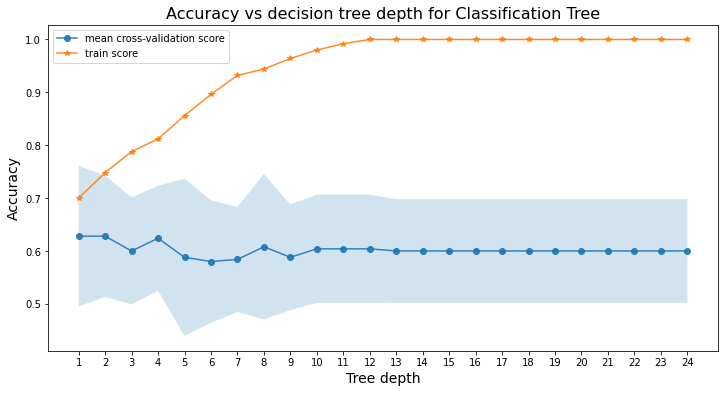

In [27]:
# 9.1 Perform a Classification Tree, where the response is categorical: whether your return was higher or lower than the previous week.(Ties can be ignored).
# Choose a suitable depth of the tree, basing your result on cross-validation

# Categorical variable indicating whether return was higher or lower this week
Class_Y = Y[1:].reset_index(drop=True)>Y[:-1].reset_index(drop=True)
Class_X = X.copy(deep=True)
Class_X.drop(index=Class_X.index[0], axis=0, inplace=True)

# Run cross-validation for tree depth upto 25
depths_list = range(1,25)
class_cv_scores_mean, class_cv_scores_std, class_accuracy_scores = run_cross_validation_on_class_trees(Class_X,Class_Y,depths_list)

# Plotting accuracy for various tree depths
plot_cross_validation_on_trees(depths_list, class_cv_scores_mean, class_cv_scores_std, class_accuracy_scores,
                                'Accuracy vs decision tree depth for Classification Tree','Accuracy')

From the figure above, a tree depth of 4 is ideal because it achieves the best average accuracy on cross-validation data. The lower bound of the confidence interval of the accuracy is high enough to make this value significant. When more nodes are added to the tree, it is clear that the cross-validation accuracy tends to decrease.

Below we check the precision, recall and the confusion matrix for a Classification Tree with Depth 4.

In [28]:
# Confusion Matrix for a Classification Tree with Depth 4

tree_model = DecisionTreeClassifier(max_depth=4, random_state=123)
tree_model.fit(Class_X,Class_Y)
Y_pred_class = tree_model.predict(Class_X)
cnf_matrix = confusion_matrix(Class_Y, Y_pred_class)
cnf_matrix

array([[ 95,  29],
       [ 18, 108]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

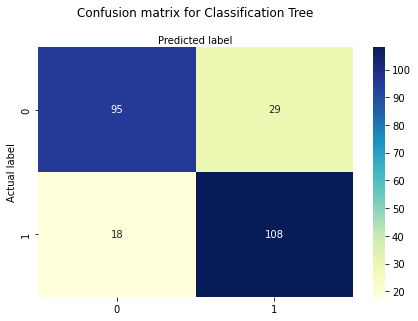

In [41]:
# Visualizing Confusion Matrix using Heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Classification Tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [30]:
# Classification Report
print(classification_report(Class_Y, Y_pred_class))

              precision    recall  f1-score   support

       False       0.84      0.77      0.80       124
        True       0.79      0.86      0.82       126

    accuracy                           0.81       250
   macro avg       0.81      0.81      0.81       250
weighted avg       0.81      0.81      0.81       250



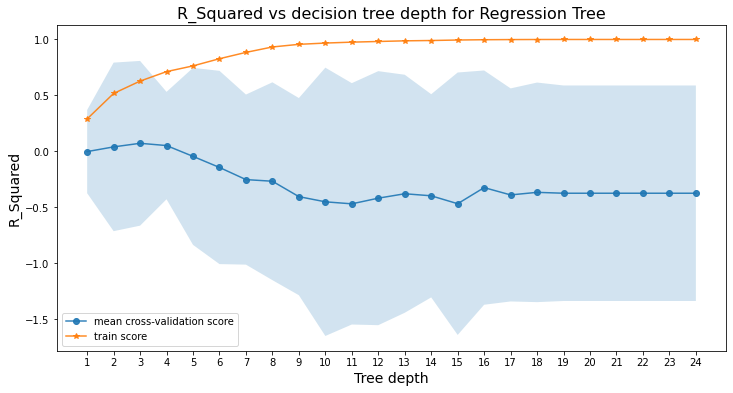

In [31]:
# 9.2 Perform a Regression Tree. The difference here is the response is continuous. This value should be the weekly return that you calculated on each series. Choose a suitable depth of the tree, basing your result on cross-validation

# Response variable to be weekly log return
Reg_Y = Y.copy(deep=True)
Reg_X = X.copy(deep=True)

# Run cross-validation for tree depth upto 25
depths_list = range(1,25)
reg_cv_scores_mean, reg_cv_scores_std, reg_accuracy_scores = run_cross_validation_on_reg_trees(Reg_X,Reg_Y,depths_list)

# Plotting accuracy for various tree depths
plot_cross_validation_on_trees(depths_list, reg_cv_scores_mean, reg_cv_scores_std, reg_accuracy_scores,
                                'R_Squared vs decision tree depth for Regression Tree','R_Squared')

From the figure above, we observe that the R<sup>2</sup> (explained variance) on cross-validation data is only slightly positive for small depth values and negative thereafter, indicating that the model doesn't fit the data. A tree depth of 3 is ideal because it gives the highest R<sup>2</sup>.

Below we check the precision, recall and the confusion matrix for a Regression Tree with Depth 3. In order to do so, we have taken the continuous output from the regression model and converted it to binary signal output whether the return was higher or lower than last week.

In [32]:
# Confusion Matrix for a Regression Tree with Depth 3

tree_model = DecisionTreeRegressor(max_depth=3, random_state=123)
tree_model.fit(Reg_X,Reg_Y)
Y_pred_reg = tree_model.predict(Reg_X)

# Covert continuous wekely return to signal (highe rof lower return) to run confusion matrix
Y_pred_reg_Signal = pd.DataFrame(Y_pred_reg[1:]).reset_index(drop=True)>pd.DataFrame(Y_pred_reg[:-1]).reset_index(drop=True)
Reg_Y_Signal = Reg_Y[1:].reset_index(drop=True)>Reg_Y[:-1].reset_index(drop=True)
Reg_Y_Signal
cnf_matrix_reg = confusion_matrix(Reg_Y_Signal, Y_pred_reg_Signal)
cnf_matrix_reg

array([[112,  12],
       [ 53,  73]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

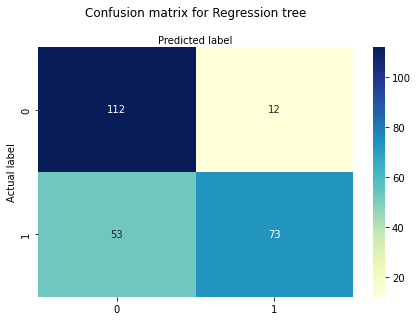

In [40]:
# Visualizing Confusion Matrix using Heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_reg), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Regression tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [34]:
# Classification Report
print(classification_report(Reg_Y_Signal, Y_pred_reg_Signal))

              precision    recall  f1-score   support

       False       0.68      0.90      0.78       124
        True       0.86      0.58      0.69       126

    accuracy                           0.74       250
   macro avg       0.77      0.74      0.73       250
weighted avg       0.77      0.74      0.73       250



9.3 Which performed better, the classification or the regression tree?

The classification tree performed much better with F1-score around 81%, whereas the regression tree generally very low or negative R<sup>2</sup> for continuous output and F1-score around 74% for binary signal output.

## Support Vector Machines (SVM)

In [35]:
# 10.1 Instead of running a regression tree, use SVM.  Use the original space of 35 variables

# Split the data into training and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=2/3, test_size=1/3)

#Encoding the target Label
lbl = LabelEncoder()
trans_Y = lbl.fit_transform(Y_train)
trans_test_Y = lbl.fit_transform(Y_test)

In [38]:
# Create and train an SVM Regressor
svm_model = SVR() # default kernel is 'rbf'
svm_model.fit(X_train, trans_Y)

# Predict for the test dataset
Y_pred = svm_model.predict(X_test)
mse = mean_squared_error(trans_test_Y, Y_pred)
rmse = np.sqrt(mse)
print("RMSE:",rmse)

RMSE: 47.99546674561227


In [39]:
# 10.2 Choose a kernel. Rerun the SVM.

# Create and train an SVM Regressor with a linear kernel
svm_lin_model = SVR(kernel='linear') 
svm_lin_model.fit(X_train, trans_Y)

# Predict for the test dataset
Y_pred_lin = svm_lin_model.predict(X_test)
mse_lin = mean_squared_error(trans_test_Y, Y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
print("RMSE:",rmse_lin)

RMSE: 48.0410904551161


10.3 Compare the results of the 2 SVMs.  Comment on how well the data is linearly separable.

Using a linear kernel gives a slightly lower RMSE; this indicates that the data is not quite linearly separable.